# Visualizing Stress Data (Demo)
Here are some pre-built methods to plot stress stream data


## Import packages

In [1]:
%reload_ext autoreload
from util.dependencies import *

## Create CerebralCortex object

In [2]:
CC = Kernel("/home/md2k/cc_conf/")

## Generate some sample stress data

In [3]:
stream_name="STRESS-STREAM"
user_id = "00000000-afb8-476e-9872-6472b4e66b68"
data = gen_stress_data(True)
metadata = gen_phone_battery_metadata(stream_name=stream_name) # TODO: need to generate stress specific metadata
ds = DataStream(data, metadata)

## Show sample stress data

In [4]:
ds.show(3, truncate=False)

+------------------------------------+-------------------+-------------------+-------------------+-------+--------+-------------+------------------------+--------+
|user_id                             |timestamp          |start_time         |end_time           |density|location|stresser_main|stresser_sub            |activity|
+------------------------------------+-------------------+-------------------+-------------------+-------+--------+-------------+------------------------+--------+
|a1112de1-ca36-42fc-aabe-7ec45cd552c5|2019-01-09 18:34:59|2019-01-09 18:34:59|2019-01-09 19:03:59|0.3    |work    |Job          |Bored / Not enough to do|STILL   |
|a1112de1-ca36-42fc-aabe-7ec45cd552c5|2019-01-09 20:34:59|2019-01-09 20:34:59|2019-01-09 20:40:59|0.3    |work    |Job          |Bored / Not enough to do|STILL   |
|a1112de1-ca36-42fc-aabe-7ec45cd552c5|2019-01-10 01:34:59|2019-01-10 01:34:59|2019-01-10 02:19:59|0.3    |work    |Job          |Bored / Not enough to do|STILL   |
+---------------

## Plot stress data

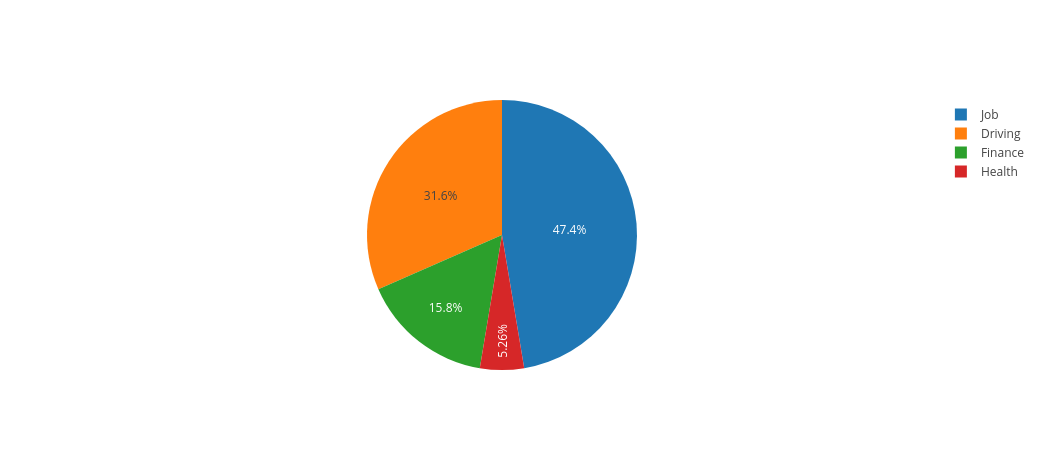

In [5]:
ds.plot_stress_pie()

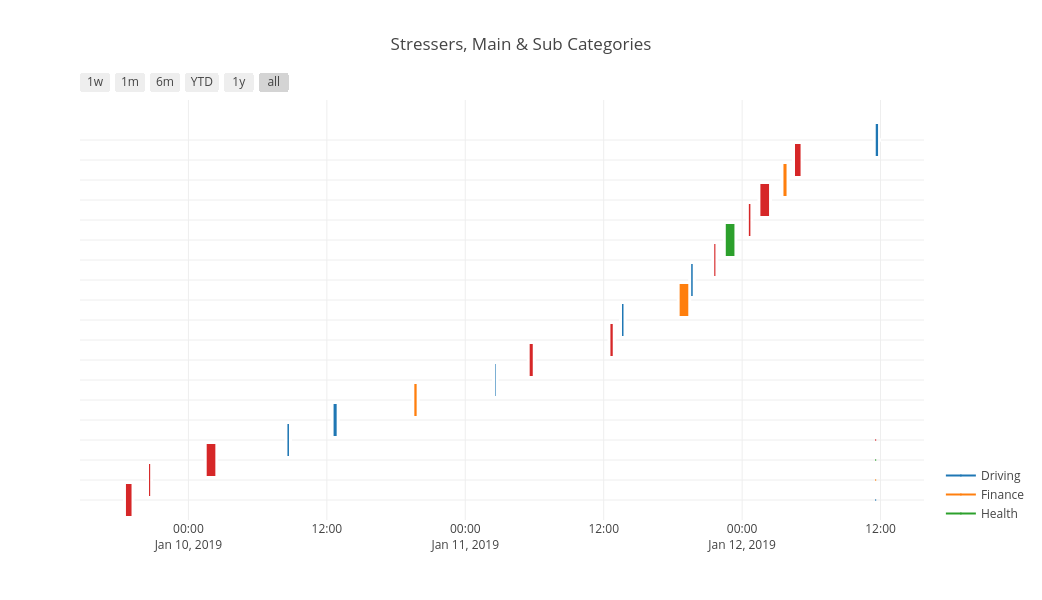

In [6]:
ds.plot_stress_gantt()

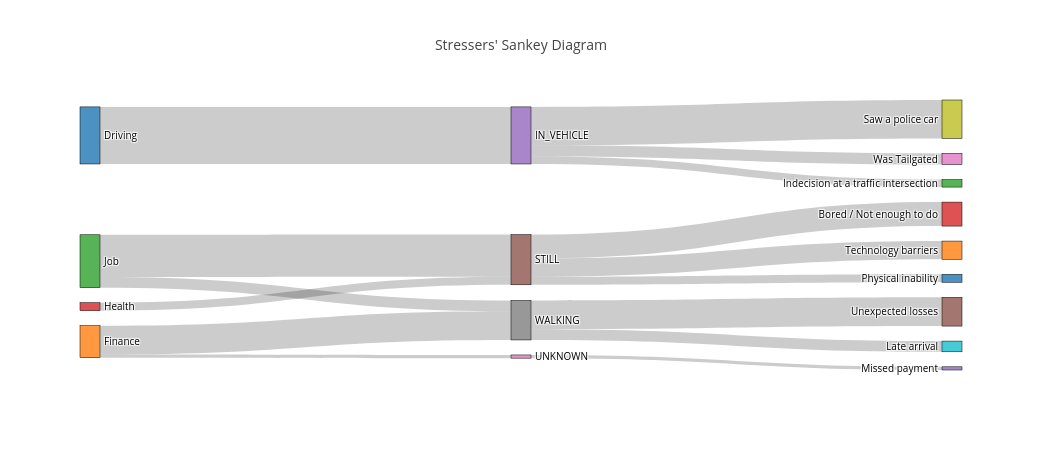

In [7]:
ds.plot_stress_sankey(cat_cols=["stresser_main","activity","stresser_sub"])

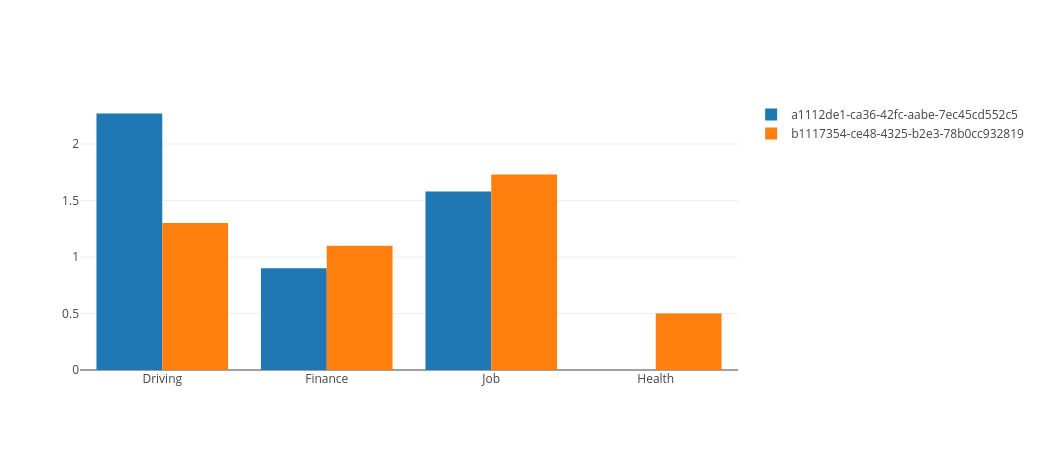

In [8]:
ds.plot_stress_bar()

## Compare stress data among user(s)

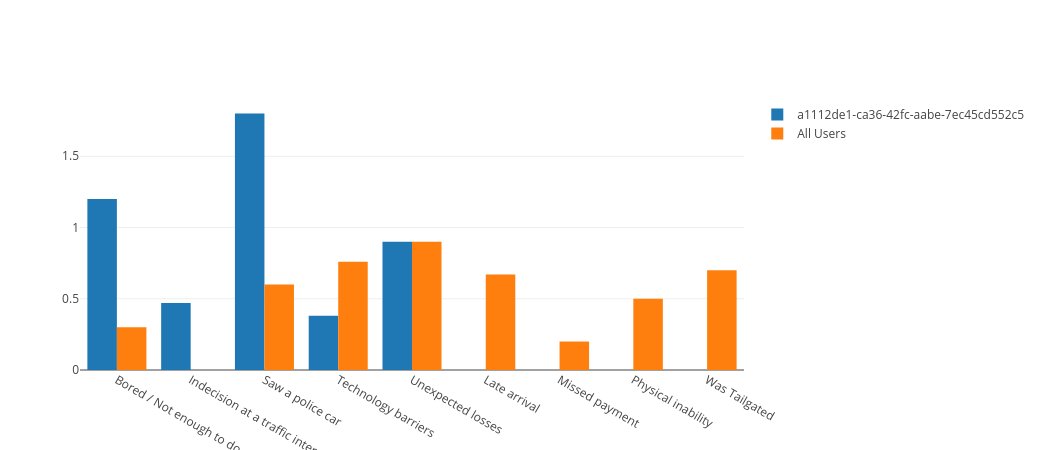

In [9]:
ds.plot_stress_comparison(x_axis_column="stresser_sub",usr_id="a1112de1-ca36-42fc-aabe-7ec45cd552c5")